# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [40]:
# student details 1: Rachel S, ID: 1835
# student details 2: Noga M, ID: 4414

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT (GPT-5)

Goal:
Assist in completing the supervised learning assignment by providing explanations, reviewing code, ensuring compliance with the PDF instructions, and generating clear presentation text for two presenters.

Prompt1:
Review the Jupyter Notebook and confirm that it meets all requirements for a group submission, based on the assignment instructions.

Prompt2:
Provide feedback and improvements on the EDA section, including explanations for each visualization and suggestions for additional graphs.

</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

This assignment focuses on a binary classification problem where the goal is to predict if a breast tumor is Benign (0) or Malignant (1). The dataset contains 30 numerical features that describe different properties of the tumor, such as radius, texture, concavity, symmetry, and fractal dimension. These features are provided in three versions: mean, standard error, and worst values. The dataset is already split into training and testing sets, so no additional split is needed. For evaluation, we use the F1 score, which balances precision and recall, making it suitable for this type of medical data where both false positives and false negatives are important to minimize.

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer

train_path = "C:/Users/rache/Desktop/machine learning/cancer_train.csv"
test_path  = "C:/Users/rache/Desktop/machine learning/cancer_test.csv"
y_col = "target"
drop_cols = []
feature_cols = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension", "radius error", "texture error", "perimeter error", "area error", "smoothness error", "compactness error", "concavity error", "concave points error", "symmetry error", "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension"]

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

for c in drop_cols:
    if c in df_train.columns: df_train = df_train.drop(columns=[c])
    if c in df_test.columns:  df_test  = df_test.drop(columns=[c])

X_train = df_train[feature_cols].copy()
y_train = df_train[y_col].astype(str).copy()

X_test = df_test[feature_cols].copy()
y_test = df_test[y_col].astype(str).copy() if y_col in df_test.columns else None

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
print("\nTrain label distribution:")
print(y_train.value_counts())

display(X_train.head())
display(X_test.head())

Train shape: (455, 30) | Test shape: (114, 30)

Train label distribution:
target
1    277
0    178
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.670,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.140,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,20.380,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,16.970,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,16.760,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,22.660,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,13.860,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834


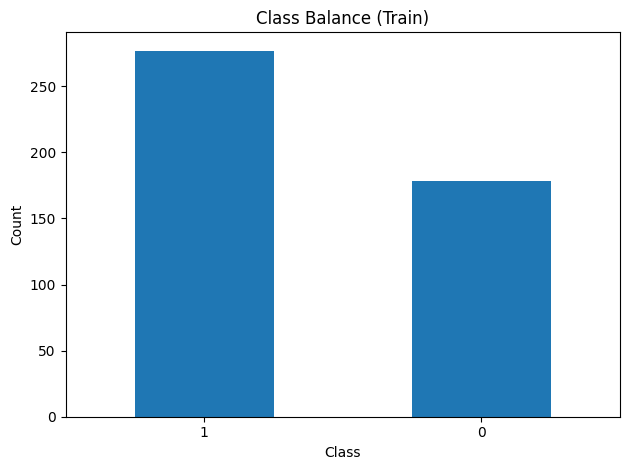

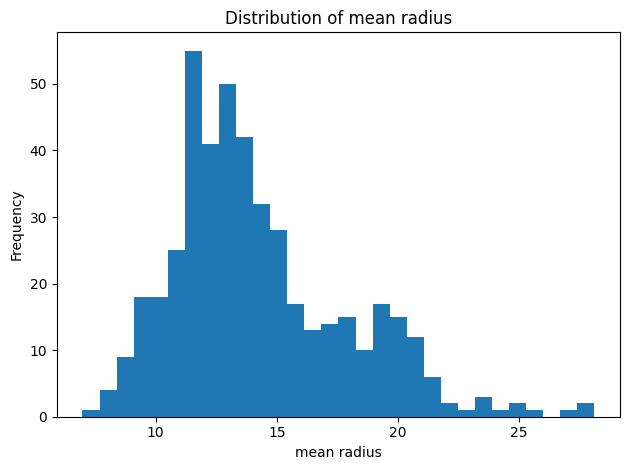

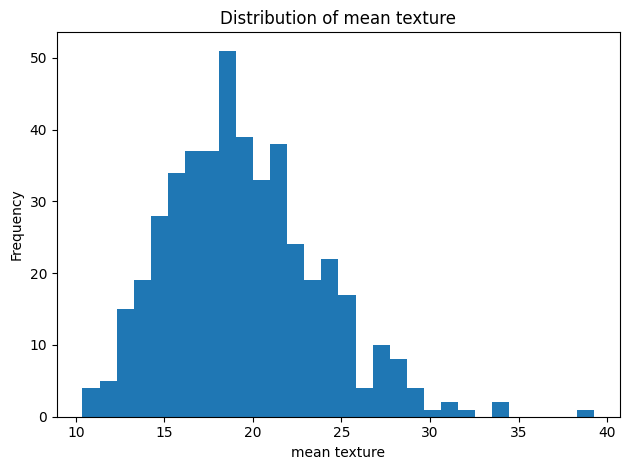

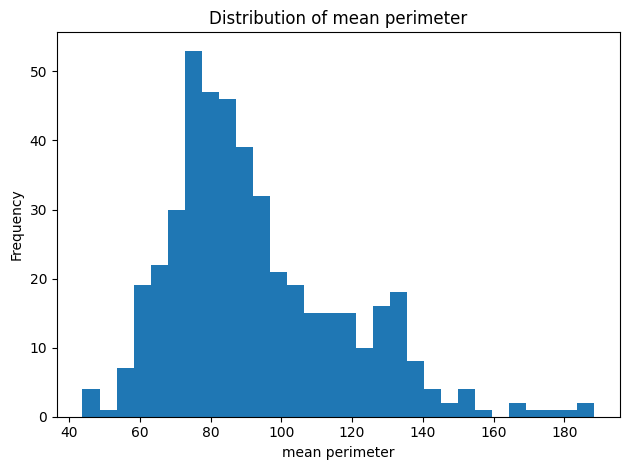

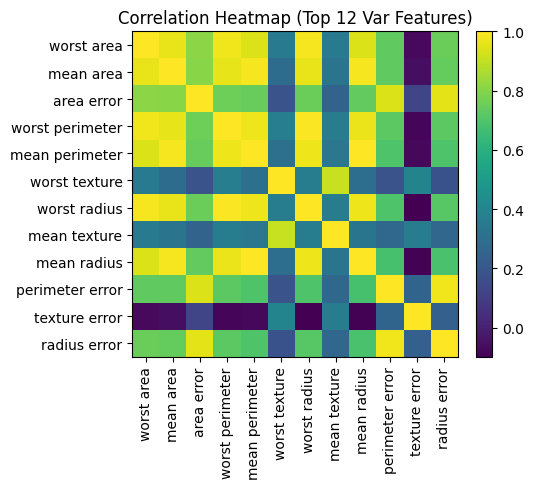

In [17]:
# EDA charts (matplotlib only)
plt.figure()
y_train.value_counts().plot(kind='bar', rot=0, title='Class Balance (Train)')
plt.xlabel('Class'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

# 2) Distributions of a few features
some_feats = feature_cols[:3] if len(feature_cols) >= 3 else feature_cols
for feat in some_feats:
    plt.figure()
    X_train[feat].plot(kind='hist', bins=30, title=f'Distribution of {feat}')
    plt.xlabel(feat); plt.ylabel('Frequency'); plt.tight_layout(); plt.show()

# 3) Correlation heatmap (top 12 variance features)
variances = X_train.var().sort_values(ascending=False)
top_feats = variances.index[:12].tolist()
corr = X_train[top_feats].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr, interpolation='nearest')
plt.title('Correlation Heatmap (Top 12 Var Features)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(top_feats)), top_feats, rotation=90)
plt.yticks(range(len(top_feats)), top_feats)
plt.tight_layout(); plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [46]:
def make_preprocess(scale: bool):
    steps = [('imputer', SimpleImputer(strategy='median'))]
    if scale:
        steps.append(('scaler', StandardScaler()))
    return Pipeline(steps)

def make_selector(k):
    return 'passthrough' if k is None else SelectKBest(score_func=f_classif, k=k)

pipe = Pipeline(steps=[
    ('pre', make_preprocess(False)),
    ('sel', 'passthrough'),
    ('clf', LogisticRegression(max_iter=200, random_state=42))
])

param_grid = [
    {
        'pre': [make_preprocess(False), make_preprocess(True)],
        'sel': [make_selector(None), make_selector(10)],
        'clf': [LogisticRegression(max_iter=200, solver='liblinear', random_state=42)],
        'clf__C': [0.1, 1.0, 10.0],
    },
    {
        'pre': [make_preprocess(False), make_preprocess(True)],
        'sel': [make_selector(None), make_selector(10)],
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 300],
        'clf__max_depth': [None, 10],
    },
]

majority_label = y_train.value_counts().idxmax()
scorer = make_scorer(f1_score, pos_label=majority_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    refit=True,
    return_train_score=False,
    verbose=0
)

grid.fit(X_train, y_train)

print("Best CV F1 (majority class):", grid.best_score_)
print("Best params:")
print(grid.best_params_)

res = pd.DataFrame(grid.cv_results_)
res_simple = pd.DataFrame({
    'rank_test_score': res['rank_test_score'],
    'mean_test_f1_majority': res['mean_test_score'],
    'param_pre': res['param_pre'].astype(str),
    'param_sel': res['param_sel'].astype(str),
    'param_clf': res['param_clf'].astype(str),
    'param_clf_C': res.get('param_clf_C', pd.Series([np.nan]*len(res))),
    'param_clf_n_estimators': res.get('param_clf_n_estimators', pd.Series([np.nan]*len(res))),
    'param_clf_max_depth': res.get('param_clf_max_depth', pd.Series([np.nan]*len(res))),
}).sort_values('rank_test_score')

display(res_simple.head(10))
res_simple.to_csv('cv_results_final.csv', index=False)
print("Saved grid results cv_results_final.csv")

Best CV F1 (majority class): 0.9838481338481339
Best params:
{'clf': LogisticRegression(max_iter=200, random_state=42, solver='liblinear'), 'clf__C': 10.0, 'pre': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), 'sel': 'passthrough'}


,rank_test_score,mean_test_f1_majority,param_pre,param_sel,param_clf,param_clf_C,param_clf_n_estimators,param_clf_max_depth
10,1,0.983848,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,"LogisticRegression(max_iter=200, random_state=...",NaN,NaN,NaN
6,2,0.982109,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,"LogisticRegression(max_iter=200, random_state=...",NaN,NaN,NaN
2,3,0.980434,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,"LogisticRegression(max_iter=200, random_state=...",NaN,NaN,NaN
16,4,0.975180,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
24,4,0.975180,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
26,4,0.975180,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
18,4,0.975180,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
12,8,0.971726,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
14,8,0.971726,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN
22,8,0.971726,"Pipeline(steps=[('imputer', SimpleImputer(stra...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,NaN


Saved grid results cv_results_final.csv


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [49]:
best_model = grid.best_estimator_
print(best_model)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('sel', 'passthrough'),
                ('clf',
                 LogisticRegression(C=10.0, max_iter=200, random_state=42,
                                    solver='liblinear'))])


## Part 5 - Apply on test and show model performance estimation

Test F1 (majority class='1'): 0.9677

Classification report:
              precision    recall  f1-score   support

           0     0.8718    1.0000    0.9315        34
           1     1.0000    0.9375    0.9677        80

    accuracy                         0.9561       114
   macro avg     0.9359    0.9688    0.9496       114
weighted avg     0.9618    0.9561    0.9569       114



<Figure size 640x480 with 0 Axes>

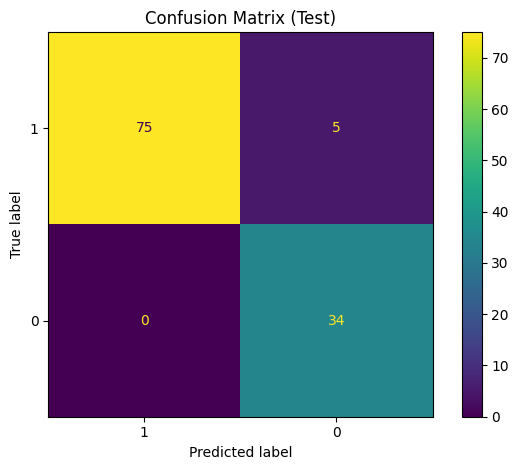

,y_true,y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


Saved sample predictions to test_predictions_final_sample.csv


In [59]:
if y_test is not None:
    y_pred = best_model.predict(X_test)
    majority_label = y_train.value_counts().idxmax()
    f1_majority = f1_score(y_test, y_pred, pos_label=majority_label)
    print(f"Test F1 (majority class='{majority_label}'): {f1_majority:.4f}\n")

    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))

    labels_order = [majority_label] + [l for l in sorted(y_train.unique()) if l != majority_label]
    cm = confusion_matrix(y_test, y_pred, labels=labels_order)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_order)
    import matplotlib.pyplot as plt
    plt.figure()
    disp.plot(values_format='d')
    plt.title('Confusion Matrix (Test)')
    plt.tight_layout(); plt.show()

    out_df = pd.DataFrame({'y_true': y_test.reset_index(drop=True),
                           'y_pred': pd.Series(y_pred).reset_index(drop=True)})
    display(out_df.head(5))
    out_df.to_csv(r'C:\Users\rache\Desktop\machine learning\test_predictions_final_sample.csv', index=False)
    print("Saved sample predictions to test_predictions_final_sample.csv")
else:
    print("No labels found in test set; skipping evaluation.")